In [1]:
from examples.util.getDataset import getDataset
from examples.util.plotting import plot_w
from examples.util.test_fns import *
from examples.util.testing import shrimp_v_random, growth
from examples.util.metrics import shrimp_test, make_l2_loss
from sparse_rf.util import *
from sparse_rf.modules import make_A, make_W
from sparse_rf.algs import shrimp, l2, l1, sindy
from functools import partial
import matplotlib.pyplot as plt
from math import ceil
import gc

In [2]:
r1 = 1
r2 = 2
r3 = 3
r4 = 4
fn = partial(fn8, r1=r1, r2=r2, r3=r3, r4=r4)
q = 2
d = 10
m = 200
N = 1500
l = 1e-13

Xtr, Xte, Ytr, Yte = getDataset(fn, d=d, m=m)

trials = 10

scales = np.arange(1/q, 206, 5)

In [3]:
for scale_ in scales:
    svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(scale_))
    errs_bp = []
    for _ in range(trials):
        W, _ = make_W(d, q, N, scale=1/np.sqrt(scale_))
        Atr = make_A(Xtr, W)
        Ate = make_A(Xte, W)
        c = l1(Atr, Ytr)
        Ypred = Ate@c
        err_bp = np.sum((Ypred-Yte)**2)/len(Yte)

        errs_bp.append(err_bp)

        del W
        del Atr
        del Ate
        del c
        del Ypred

        gc.collect()

    print("Variance: {}".format(scale_))
    print("Min l2: {}".format(svr_q.err_l2))
    print("SHRIMP: {}".format(svr_q.err_shrimp))
    print("Random pruning: {}".format(svr_q.err_r))
    print("Min l1: {}".format(np.mean(errs_bp)))
    print("----------------------------")

    del errs_bp
    del svr_q

    gc.collect()

Variance: 0.5
Min l2: 18.168133604898387
SHRIMP: 5.0560373383725805
Random pruning: 6.000665398044416
Min l1: 5.021226866853583
----------------------------
Variance: 5.5
Min l2: 4.288004133575329
SHRIMP: 0.574349017432788
Random pruning: 3.517667940713016
Min l1: 5.976583009801738
----------------------------
Variance: 10.5
Min l2: 4.984825423032502
SHRIMP: 0.6840249385063085
Random pruning: 5.185901935504983
Min l1: 5.012781088228413
----------------------------
Variance: 15.5
Min l2: 4.837719721205841
SHRIMP: 0.41698271329570274
Random pruning: 5.818659354259903
Min l1: 4.713226469839184
----------------------------
Variance: 20.5
Min l2: 4.8054818972061595
SHRIMP: 0.4407604166622253
Random pruning: 5.673417107056731
Min l1: 4.57915272035525
----------------------------
Variance: 25.5
Min l2: 5.021465528420565
SHRIMP: 1.1444103740560228
Random pruning: 5.789804320890914
Min l1: 4.582836258787991
----------------------------
Variance: 30.5
Min l2: 5.295296552062373
SHRIMP: 1.57224748

In [4]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(10.5))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))

Min l2: 4.621917620530518
SHRIMP: 0.8047940568081288
Random pruning: 4.747595129684408


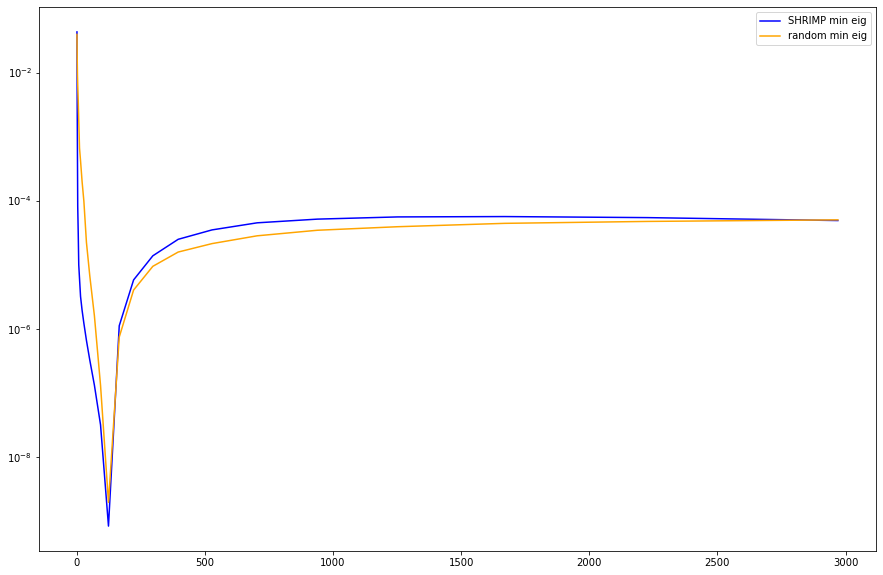

In [5]:
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()

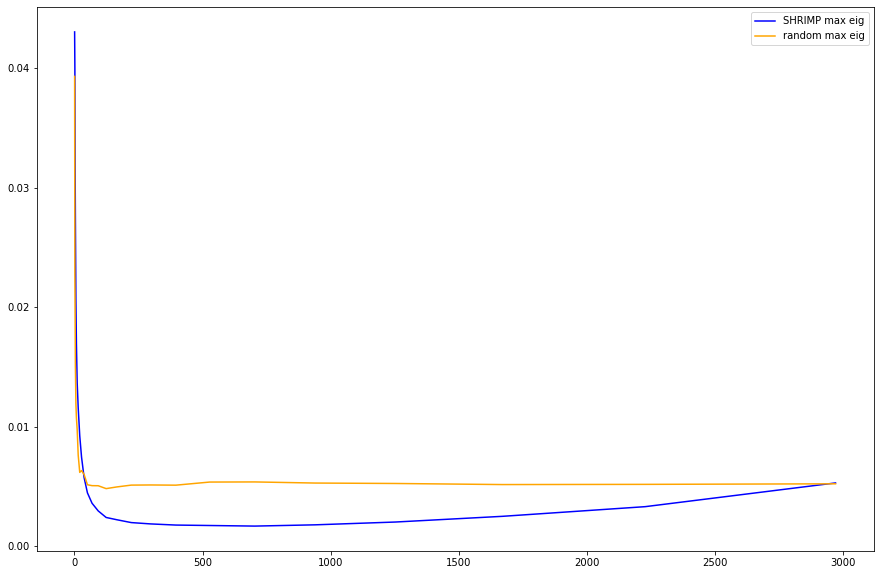

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()

In [7]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(15.5))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))

Min l2: 4.185093544635948
SHRIMP: 0.198492637315073
Random pruning: 5.012320412085734


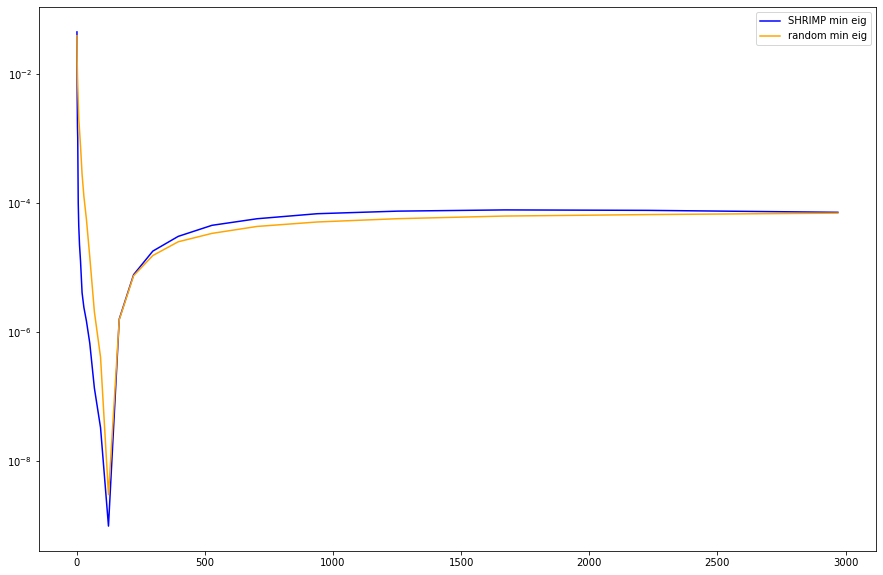

In [8]:
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()

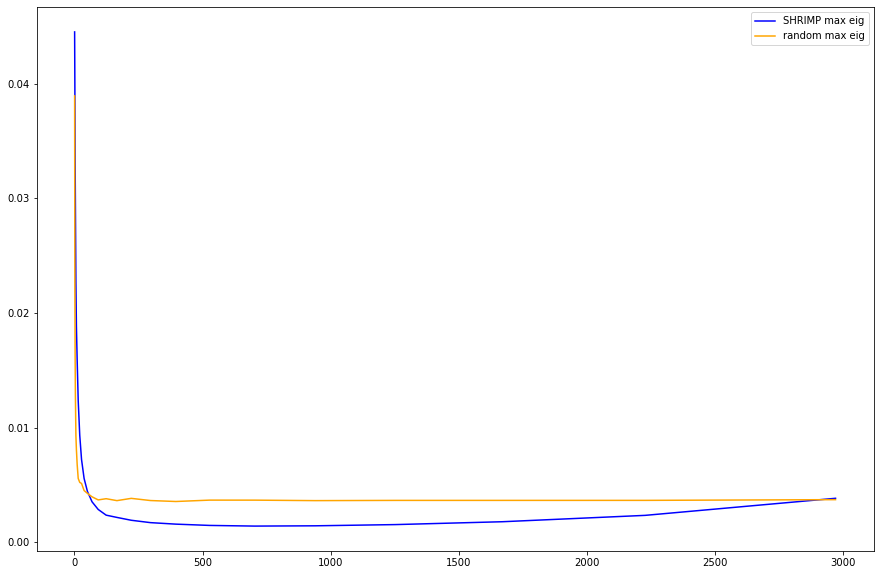

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()

In [10]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(20.5))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))

Min l2: 4.527575063714724
SHRIMP: 0.28121644983671795
Random pruning: 4.499271425832757


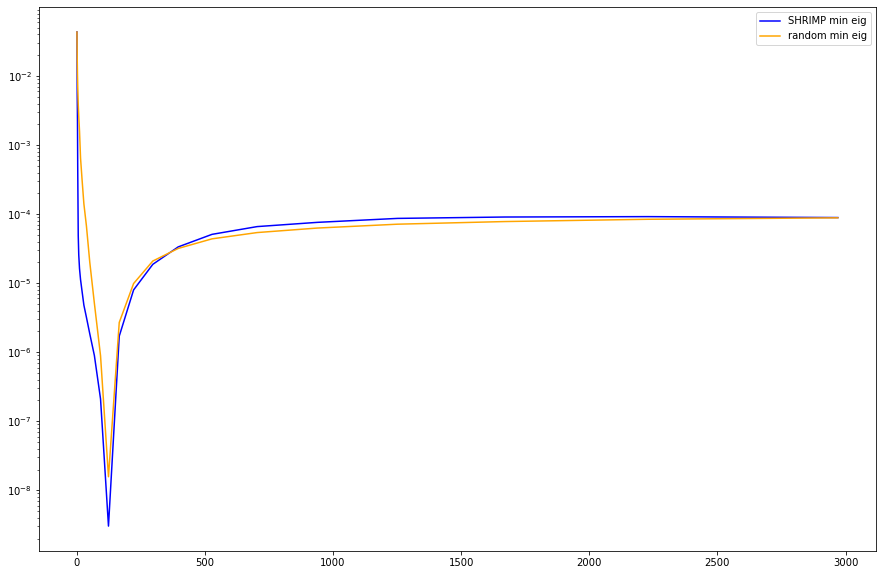

In [11]:
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()

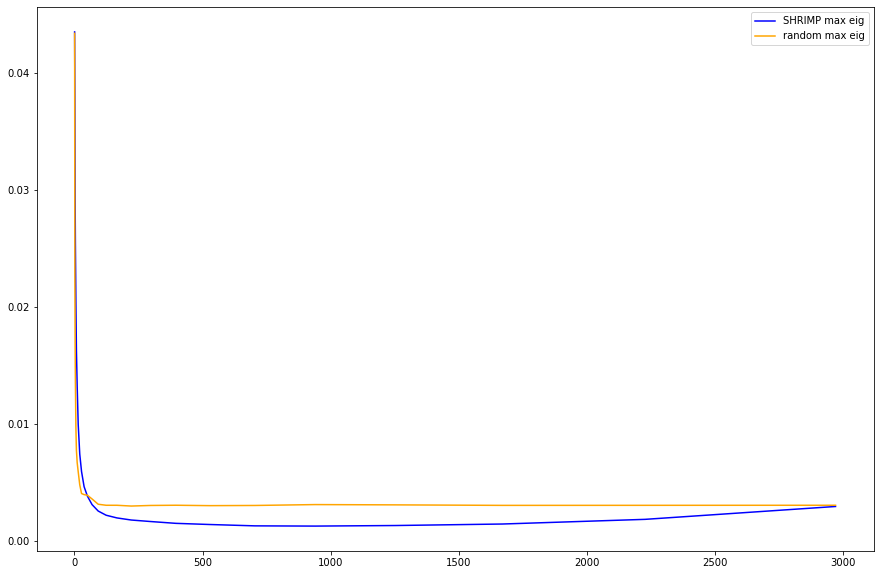

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()